# Customer Churn Analysis
This report presents an exploratory data analysis (EDA) of customer churn data to identify key predictors of churn. The goal is to understand patterns in the data that can help in predicting customer churn.


# Data loading and Pre-processing
The data had zero nulls and zero duplicates. Data-types for the respective columns were also relevant.

In [1]:
# Importing the dataset!
import pandas as pd
df = pd.read_csv('telecom_churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [2]:
df.shape

(3333, 11)

In [3]:
# Checking for nulls!
df.isna().sum()

,0
Churn,0
AccountWeeks,0
ContractRenewal,0
DataPlan,0
DataUsage,0
CustServCalls,0
DayMins,0
DayCalls,0
MonthlyCharge,0
OverageFee,0


In [4]:
# Checking for duplicates!
df.duplicated().sum()

0

In [5]:
# datatypes of column!
df.dtypes

,0
Churn,int64
AccountWeeks,int64
ContractRenewal,int64
DataPlan,int64
DataUsage,float64
CustServCalls,int64
DayMins,float64
DayCalls,int64
MonthlyCharge,float64
OverageFee,float64


In [6]:
# Calculating Descriptive statistics!
descriptive_stats = df.describe()
print(descriptive_stats)

             Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
std       0.352067     39.822106         0.295879     0.447398     1.272668   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean        1.562856   179.775098   100.435644      56.305161    10.051488   
std         1.315491    54.467389    20.069084      16

###Identifying Outliers:
The data had several outliers which were identified using IQR method.
The CustomerServCalls col had highest number of outliers, which were handled by keeping them As it was vital for analysis.

In [7]:
# Identifying outliers using IQR method!
numerical_features = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins',
                      'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# define Outliers!
outliers = (df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))

# count the number of outliers in each column!
# Display the number of outliers in each numerical feature
print("Number of Outliers in Each Numerical Feature:")
print(outliers.sum())


Number of Outliers in Each Numerical Feature:
AccountWeeks      18
DataUsage         11
CustServCalls    267
DayMins           25
DayCalls          23
MonthlyCharge     34
OverageFee        24
RoamMins          46
dtype: int64


CustServCalls: The high number of outliers here might indicate customers who experienced many issues or had high support needs. This could be a valuable insight for churn analysis.

Other Features: The number of outliers in other features seems relatively small compared to the dataset size.

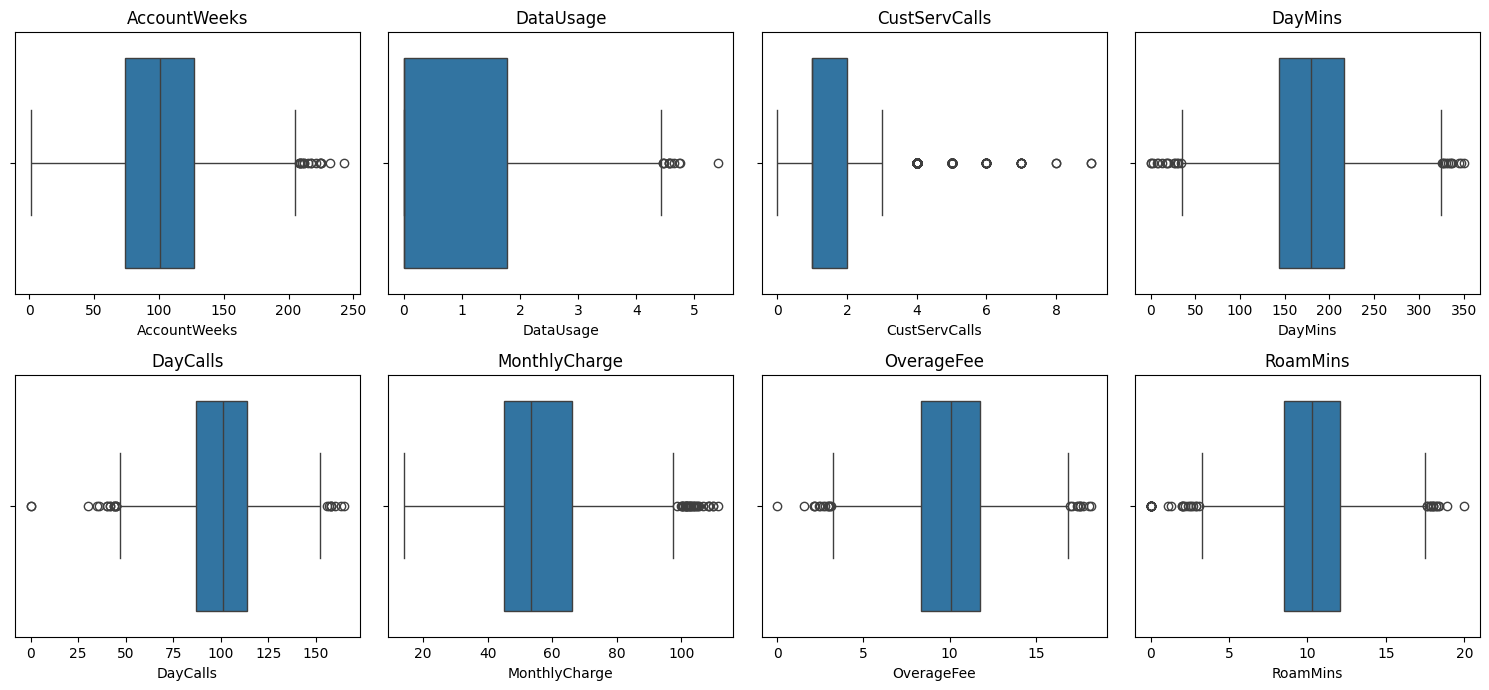

In [8]:
# Creating box plot for each numerical feature to visualise ouliers!
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Exploratory Data Analysis

In [9]:
# Compute correlation with 'Churn'
churn_corr = df.corr()['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn              1.000000
CustServCalls      0.208750
DayMins            0.205151
OverageFee         0.092812
MonthlyCharge      0.072313
RoamMins           0.068239
DayCalls           0.018459
AccountWeeks       0.016541
DataUsage         -0.087195
DataPlan          -0.102148
ContractRenewal   -0.259852
Name: Churn, dtype: float64


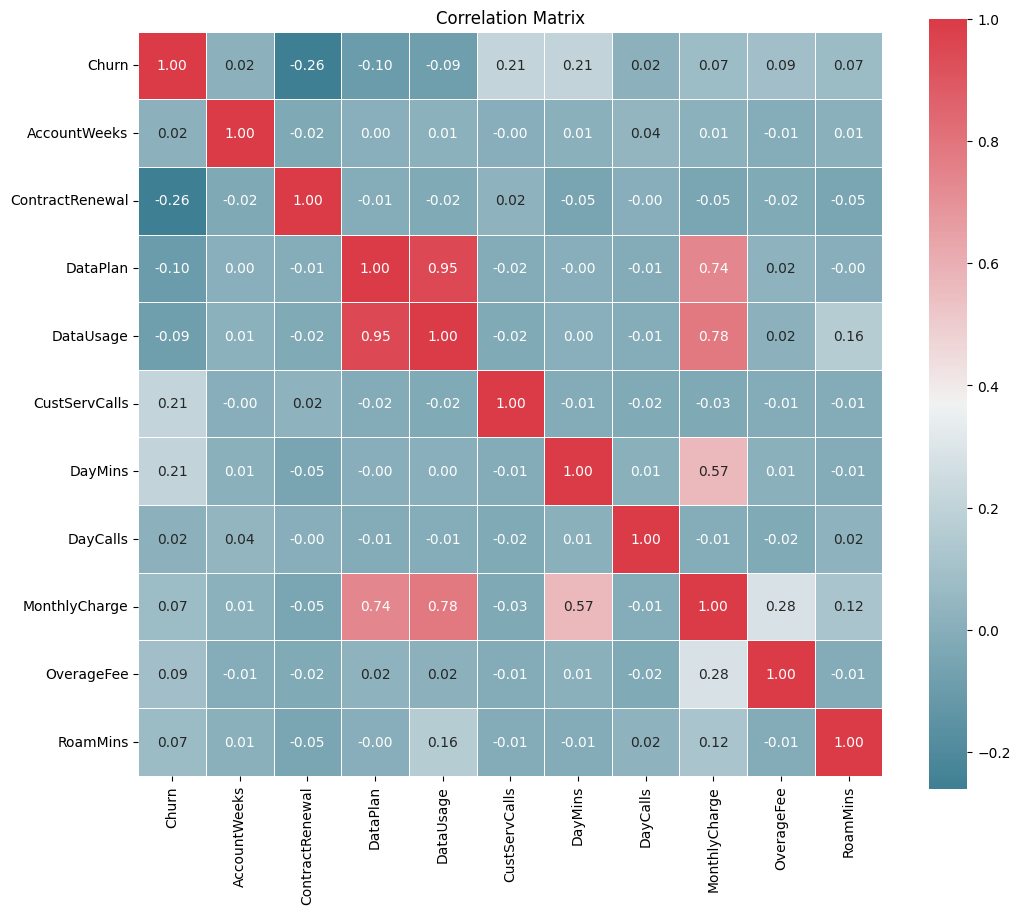

In [10]:
# Compute correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Key Insights:

* CustServCalls (0.209): Weak positive correlation.
* DayMins (0.205): Weak positive correlation.
* ContractRenewal (-0.26): Weak negative correlation. This suggests that customers who recently renewed their contracts are less likely to churn.
* DataPlan (-0.102): Weak negative correlation. This suggests that customers with a data plan are less likely to churn.
* DataUsage (-0.087): Very weak negative correlation.means that there's a slight tendency for customers with higher data usage to be a little less likely to churn.

Potential predictors: CustServCalls, DayMins, and overagefee show relatively stronger correlations and might be useful predictors in a churn prediction model.

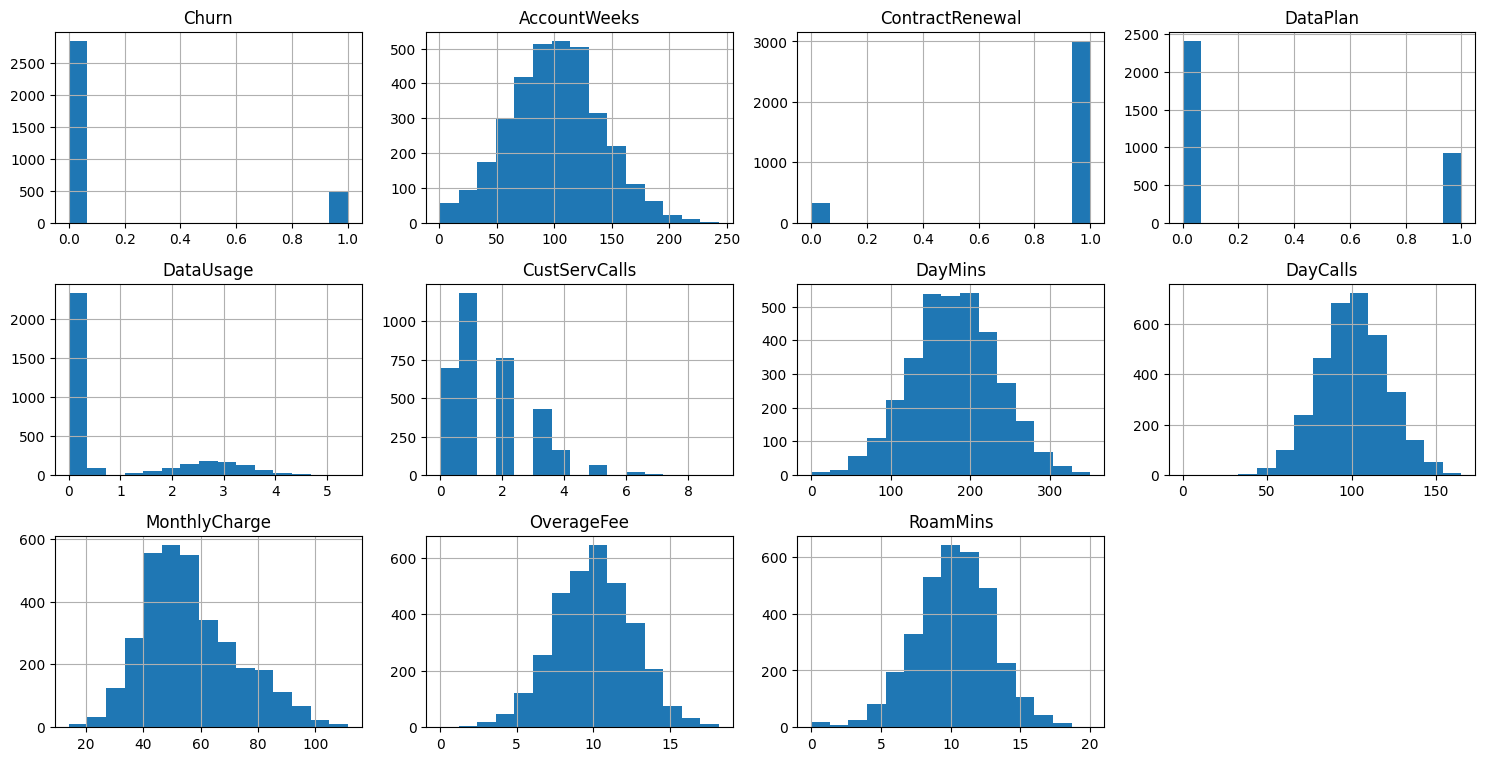

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot histograms
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

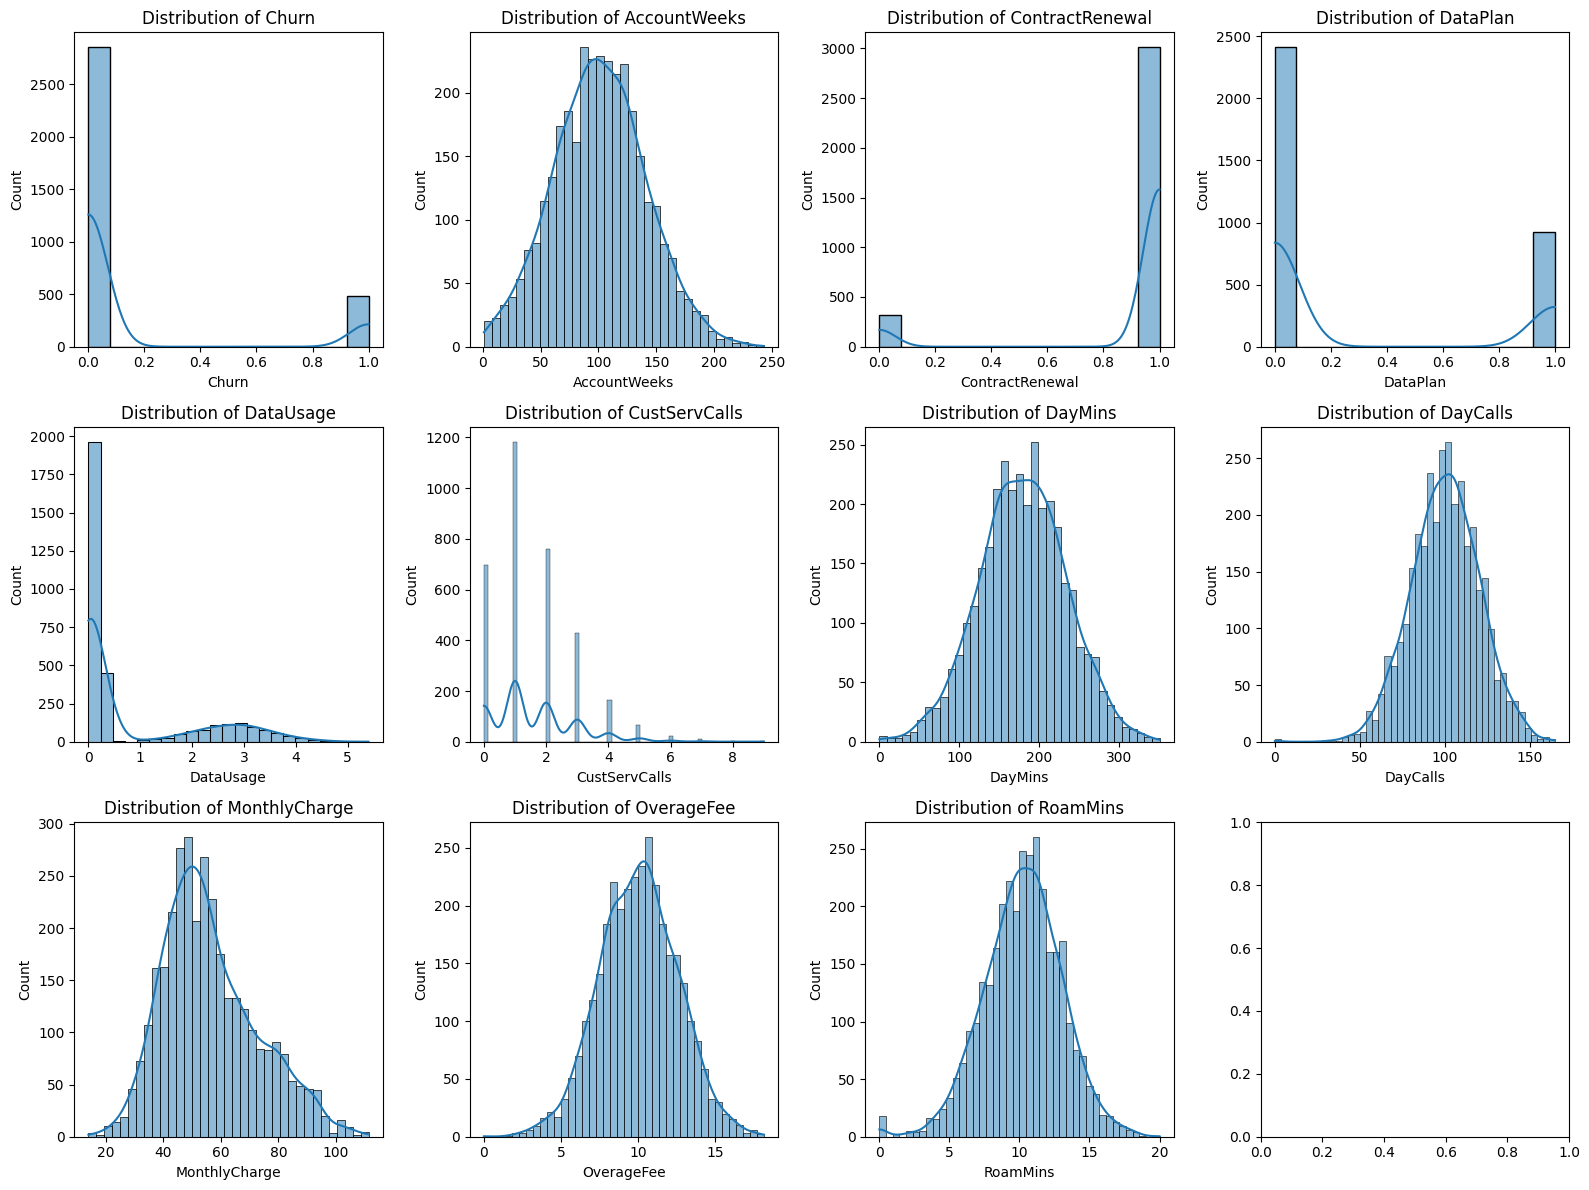

In [12]:
# Histograms for numeric columns to visualize distributions
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Key Insights:

Account weeks:
- The distribution of AccountWeeks appears to be relatively uniform, suggesting that customers have been with the company for varying lengths of time.
- There are no significant outliers or extreme values in this feature.

DataUsage:
- The distribution of DataUsage is skewed to the right, with a majority of customers having lower data usage.
- There are some customers with significantly higher data usage, which shows different customer segment.

CustomerServcalls:
- The distribution of CustServCalls is also skewed to the right, with most customers making a few or no customer service calls.
- There's a long tail, indicating some customers have made a high number of calls, which could be potential churn indicators.


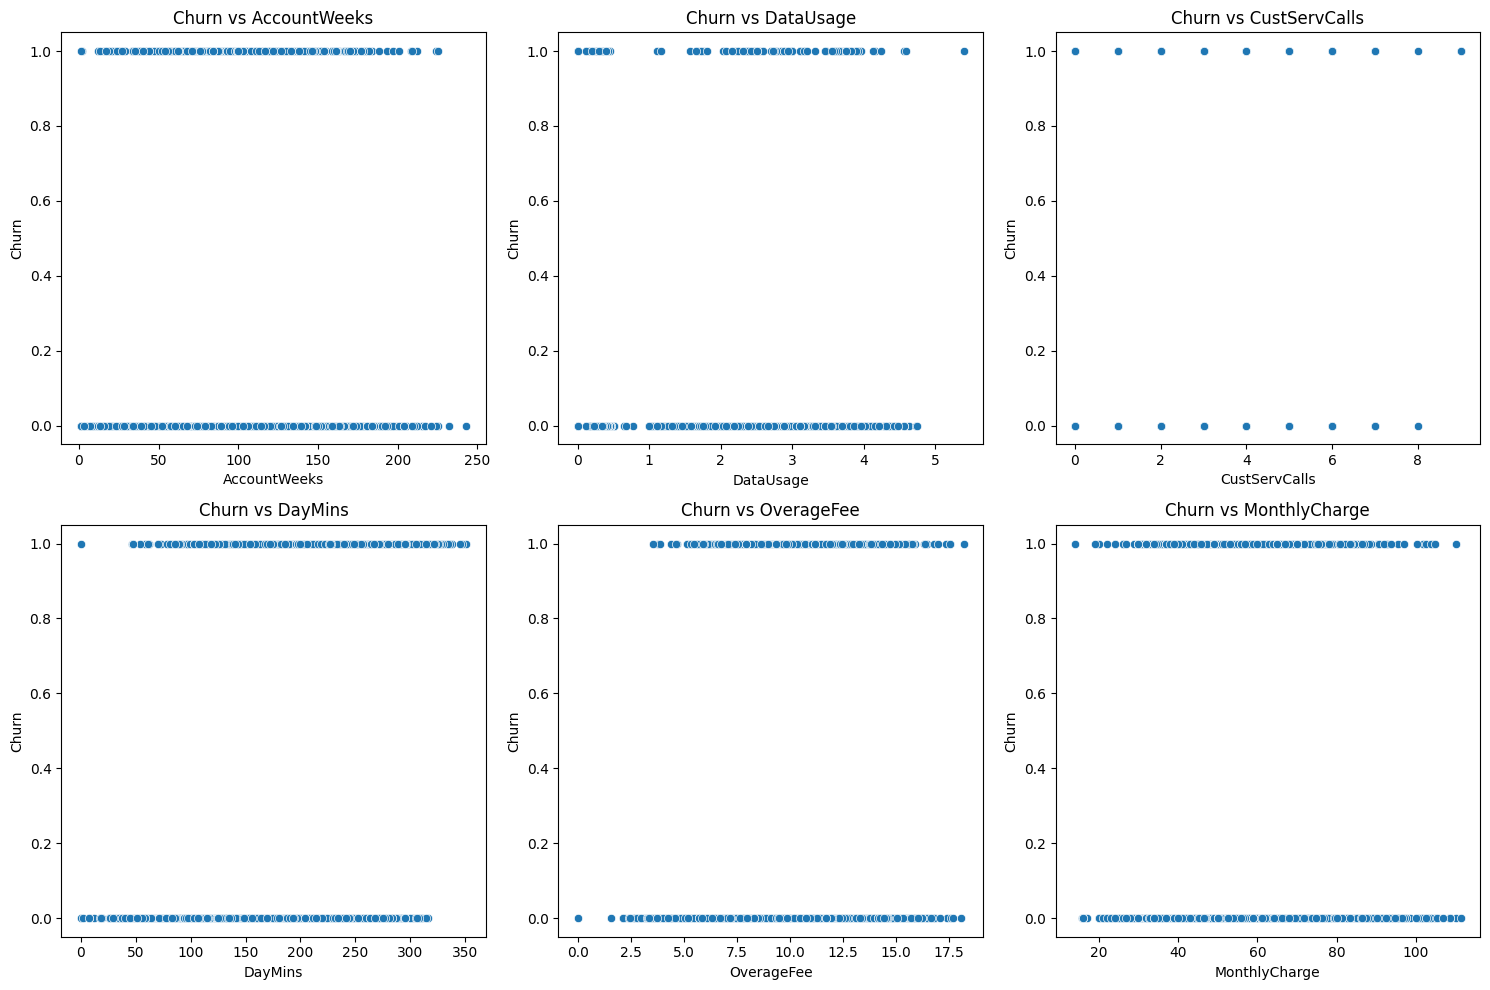

In [13]:
# Scatter plot for churn vs key numerical features
key_features = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'OverageFee', 'MonthlyCharge']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    sns.scatterplot(x=df[feature], y=df['Churn'], ax=axes[idx])
    axes[idx].set_title(f'Churn vs {feature}')

plt.tight_layout()
plt.show()

Key Insights:

* CustServCalls shows a clear trend: as the number of customer service calls increases, the likelihood of churn also rises.
* DataUsage and MonthlyCharge exhibit weaker relationships with churn, but DataUsage shows a slight decline in churn for higher usage.
-
These results suggest that CustServCalls and DataUsage might be strong predictors of churn

### Identifying Key-Predictors for Churn

Based on the EDA, the following variables appear to be strong predictors of customer churn:
- Overage Fee: Customers with higher overage fees tend to churn more often.
- DayMins: A relationship between daytime minutes and churn was observed.
- CustServCalls: The number of customer service calls is strongly correlated with churn.



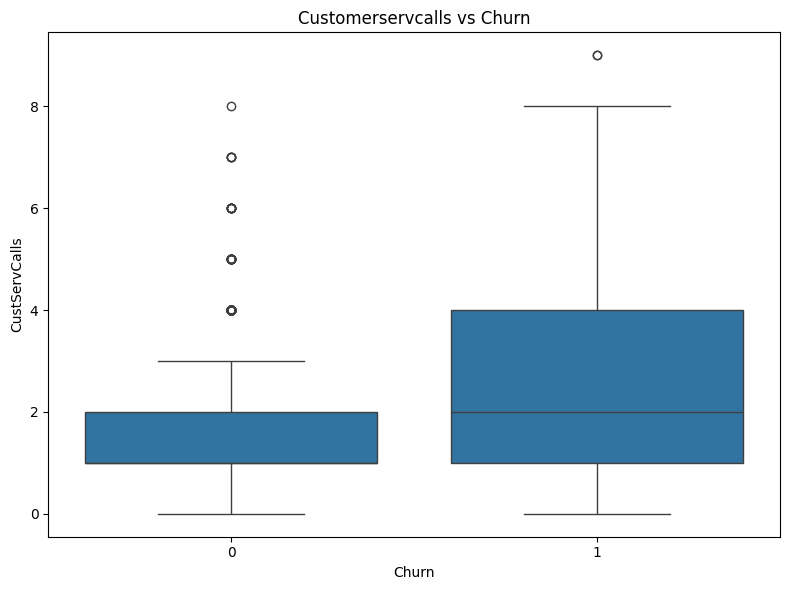

In [14]:
# examining the relationship between Customerservcalls and Churn!
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='CustServCalls', data=df)
plt.title('Customerservcalls vs Churn')
plt.tight_layout()
plt.show()

Key Insights:
* For Churn = 0: The majority of customers who didn't churn have fewer customer service calls, with a smaller range and fewer outliers.
* For Churn = 1: Customers who did churn tend to have a higher number of customer service calls, and there are some extreme values (outliers) where certain customers made many more calls than average.

This suggest that customers who frequently contacted customer service are more likely to churn, than who didn't.




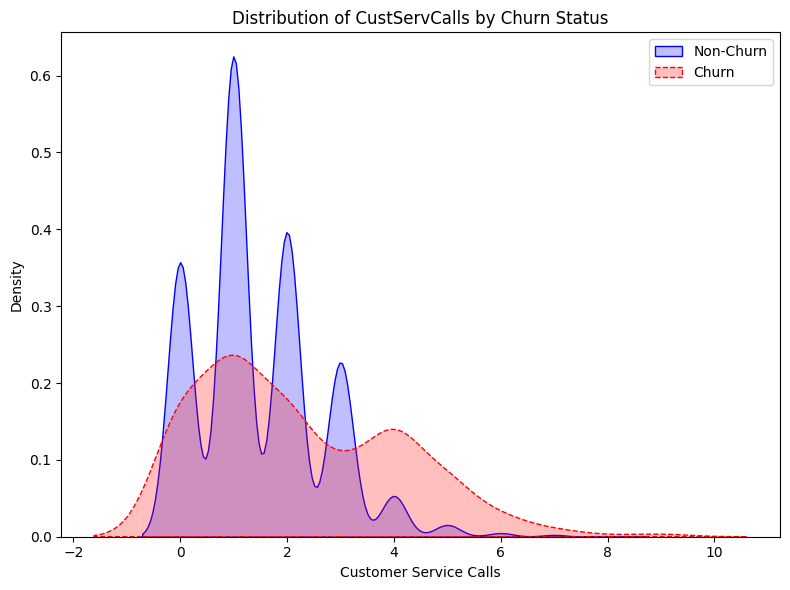

In [15]:
# Distribution of CustServCalls by Churn in kdeplot!
plt.figure(figsize=(8, 6))

sns.kdeplot(df[df['Churn'] == 0]['CustServCalls'], label='Non-Churn', fill=True, color='blue', linestyle='-')
sns.kdeplot(df[df['Churn'] == 1]['CustServCalls'], label='Churn', fill=True, color='red', linestyle='--')

plt.xlabel('Customer Service Calls')
plt.ylabel('Density')
plt.title('Distribution of CustServCalls by Churn Status')
plt.legend()
plt.tight_layout()
plt.show()

Key Insights:
- This distribution plot shows that customers with higher numbers of customer service calls tend to have a higher likelihood of churn. This trend is evident as the red dashed line (representing churned customers) has a heavier tail toward higher numbers of customer service calls, whereas the blue line (non-churned customers) peaks at fewer calls.

In [16]:
# performing Statistics test
from scipy.stats import ttest_ind

# Separate the churned and non-churned customers
churned = df[df['Churn'] == 1]['CustServCalls']
non_churned = df[df['Churn'] == 0]['CustServCalls']

# Perform an independent t-test
t_stat, p_value = ttest_ind(churned, non_churned, equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 8.95514138244338, P-value: 5.270040385717215e-18


Key Insights:
- The large t-statistic (8.96) and the extremely small p-value (5.27e-18) provide strong evidence that the difference in CustServCalls between churned and non-churned customers is statistically significant and shows strong evidence that the number of customer service calls a customer makes is indeed related to their likelihood of churning. Customers who churn tend to have a different number of customer service calls compared to those who don't.


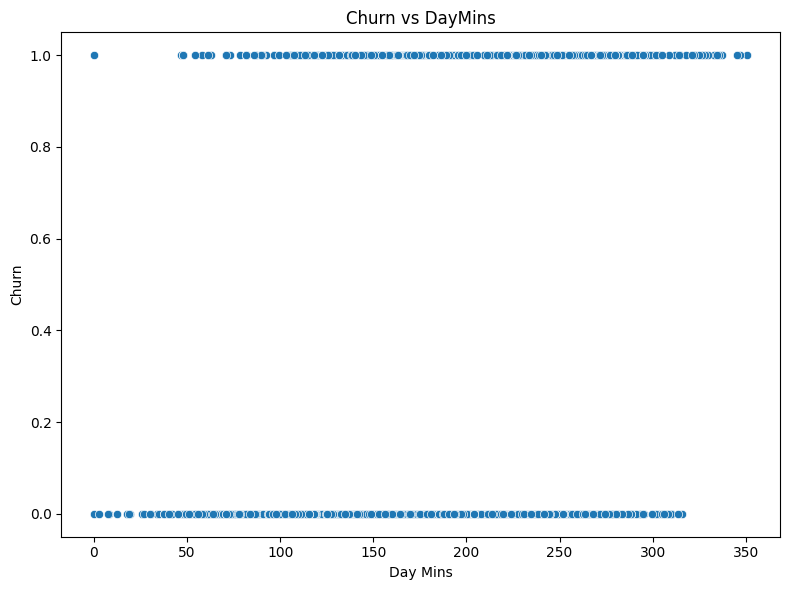

In [17]:
# Create scatter plot for Churn vs DayMins
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['DayMins'], y=df['Churn'])
plt.title('Churn vs DayMins')
plt.xlabel('Day Mins')
plt.ylabel('Churn')
plt.tight_layout()
plt.show()

Key Insights:
- The scatter plot suggests a positive correlation between DayMins and Churn.
- Customers who use more daytime minutes appear to be more likely to churn.
- There's a noticeable trend of higher churn rates (Churn = 1) for customers with higher DayMins values.

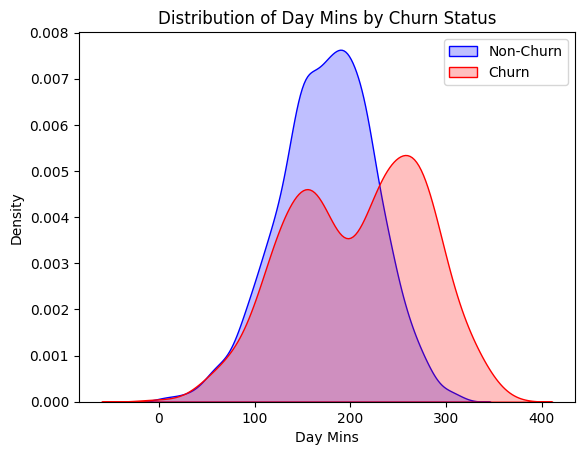

In [18]:
# Density plot of Day Mins by Churn Status
sns.kdeplot(df[df['Churn'] == 0]['DayMins'], fill=True, color="blue", label='Non-Churn')
sns.kdeplot(df[df['Churn'] == 1]['DayMins'], fill=True, color="red", label='Churn')
plt.title('Distribution of Day Mins by Churn Status')
plt.xlabel('Day Mins')
plt.legend()
plt.show()


In [19]:
churned = df[df['Churn'] == 1]['DayMins']
not_churned = df[df['Churn'] == 0]['DayMins']
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(churned, not_churned)
print(f'T-statistic: {t_stat:.2f}, P-value: {p_value:.3f}')

T-statistic: 12.10, P-value: 0.000


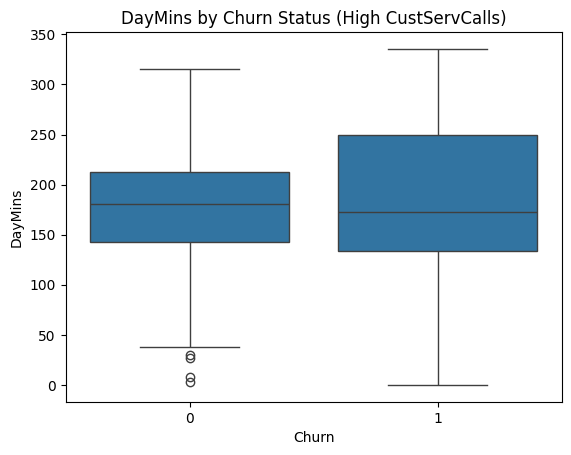

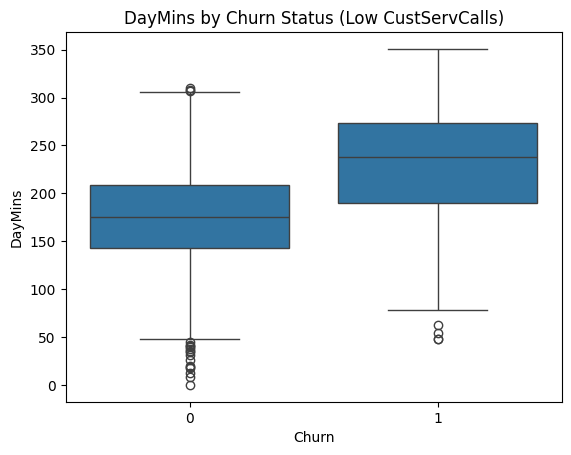

In [20]:
# Segment data by CustServCalls (e.g., high vs. low)
high_calls = df[df['CustServCalls'] > df['CustServCalls'].median()]
low_calls = df[df['CustServCalls'] <= df['CustServCalls'].median()]

# Plot DayMins vs Churn for high and low CustServCalls groups
sns.boxplot(x='Churn', y='DayMins', data=high_calls)
plt.title('DayMins by Churn Status (High CustServCalls)')
plt.show()

sns.boxplot(x='Churn', y='DayMins', data=low_calls)
plt.title('DayMins by Churn Status (Low CustServCalls)')
plt.show()


Key Insights:


- Customers who used more daytime minutes were more likely to leave the service. This could mean that those customers found the service too expensive or that they perhaps found a better deal elsewhere for their high daytime usage.
- This suggest that there's a strong link between the number of daytime minutes a customer uses and their likelihood of churning.

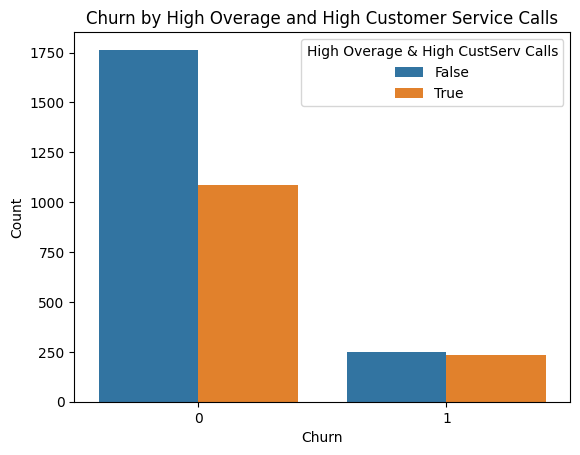

In [21]:
# Define high CustServCalls and high OverageFee based on the median
df['HighOverageHighCustServ'] = (df['CustServCalls'] >= df['CustServCalls'].median()) & (df['OverageFee'] >= df['OverageFee'].median())

# Plotting churn based on the new combined feature
sns.countplot(x='Churn', hue='HighOverageHighCustServ', data=df)
plt.title('Churn by High Overage and High Customer Service Calls')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='High Overage & High CustServ Calls')
plt.show()

Key Insights:
* Customers with both high overage fees and high customer service calls are more likely to churn compared to those with lower values in these categories.
* This combination seems to be a strong indicator of churn, which aligns with the hypothesis that customers experiencing higher service-related issues and additional costs are more likely to leave.

In [22]:
churned = df[df['Churn'] == 1]['OverageFee']
not_churned = df[df['Churn'] == 0]['OverageFee']

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(churned, not_churned)
print(f'T-statistic: {t_stat:.2f}, P-value: {p_value:.3f}')

T-statistic: 5.38, P-value: 0.000


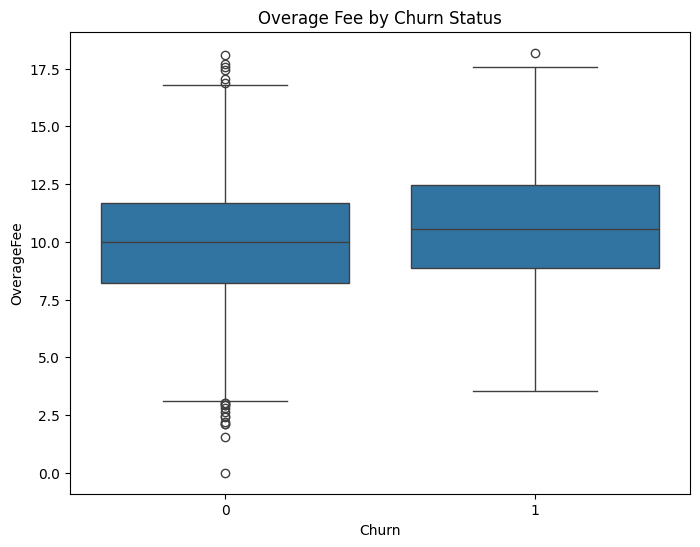

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Churn', y='OverageFee')
plt.title('Overage Fee by Churn Status')
plt.show()

Key Insights:

- It indicates that the average OverageFee for churned customers is likely higher than that of non-churned customers.

- This strongly suggests that customers who churned tended to have higher overage fees compared to those who did not churn.

# Conclusion and Recommendations:
This exploratory data analysis has revealed several key insights regarding customer churn:

- Pricing sensitivity: There is strong evidence that pricing and usage costs are major drivers of churn. Customers with higher Daytime minutes, Overage fees, Roaming minutes, and Monthly charges exhibited a significantly higher likelihood of churning.
- Customer service and satisfaction: The number of customer service calls (CustServCalls) emerged as a potential indicator of customer dissatisfaction or service-related issues. Customers who made more calls were more prone to churn.
- Interconnected factors: The analysis suggests a potential link between higher Daytime minutes, Overage fees, and Customer service calls, implying that customers experiencing billing issues or exceeding their usage limits might be more likely to contact customer service and eventually churn.

## *Recommendations*

Based on these findings, the following recommendations are proposed to mitigate customer churn:

- Competitive pricing: Evaluate current pricing strategies and consider offering more competitive plans, especially for customers with high usage patterns. This could involve:
- Usage-based discounts: Offer discounts or rewards to high-volume users.
- Tiered pricing: Introduce more flexible plans with different usage tiers to cater to diverse customer needs.
- Re-evaluate overage charges: Consider reducing or revising overage
fees to minimize customer frustration.
- Targeted retention campaigns: Develop targeted retention campaigns focusing on customer segments with high churn risk, such as those with high usage and multiple customer service interactions.

Value-added services: Explore offering value-added services or benefits to enhance customer loyalty and satisfaction. This could involve:
- Bundled packages: Offer attractive bundles that combine services at a discounted rate.
- Loyalty programs: Implement a loyalty program to reward long-term customers.

By focusing on competitive pricing, proactive customer service, and targeted retention efforts, the company can effectively reduce churn and improve customer loyalty.

